# Datetime en Pandas DataFrame

In [50]:
import pandas as pd
import numpy as np



### 1. Fechas y horas en Python
Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo incorporado ``datetime``.
Junto con el módulo de terceros ``dateutil``, puedes utilizarlo para realizar rápidamente una serie de funciones útiles sobre fechas y horas.
Por ejemplo, puedes construir manualmente una fecha utilizando el tipo ``datetime``:

In [51]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

O, utilizando el módulo ``dateutil``, puedes analizar fechas a partir de una gran variedad de formatos de cadena:

In [52]:
# https://dateutil.readthedocs.io/en/stable/parser.html#functions
from dateutil import parser
print(parser.parse("4th of July, 2015"))
print(parser.parse("07/04/2015"))
print(parser.parse("07/04/2015", dayfirst=True))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-04-07 00:00:00


In [53]:
print(parser.parse("7/4/2015"))
print(parser.parse("07-04-2015"))
print(parser.parse("2015-07-04"))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-07-04 00:00:00


Una vez que tienes un objeto ``datetime``, puedes hacer cosas como imprimir el día de la semana:


In [54]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year = 2015, month = 7, day = 4).strftime('%A')

'Saturday'

### 2. Dates y Times en numpy

In [55]:
import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [56]:
np.array('07-04-2015', dtype = np.datetime64)

ValueError: Cannot create a NumPy datetime other than NaT with generic units

Una vez que tenemos esta fecha formateada, además, podemos hacer rápidamente operaciones vectoriales sobre ella:

In [ ]:
date

array('2015-07-04', dtype='datetime64[D]')

In [ ]:
np.arange(14)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
dates = date + np.arange(12)
dates

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [ ]:
dates[0].astype('datetime64[Y]')

numpy.datetime64('2015')

Aquí tienes un datetime basado en minutos:

In [ ]:
np.datetime64('2015-07-04 12:00:30')

numpy.datetime64('2015-07-04T12:00:30')

Fíjate en que la zona horaria **se ajusta automáticamente a la hora local del ordenador que ejecuta el código**.
Puedes forzar cualquier unidad deseada utilizando uno de los muchos códigos de formato; por ejemplo, aquí forzaremos un tiempo basado en nanosegundos.

La siguiente tabla, extraída de la [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), enumera los códigos de formato disponibles junto con los intervalos de tiempo relativos y absolutos que pueden codificar:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### 3. Fechas y horas en Pandas

#### Argumentos por defecto

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df

,date,value
0,3/10/2000,2
1,3/11/2000,3
2,3/12/2000,4


In [ ]:
df.dtypes

date     object
value     int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

#### Formato para el primer día

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


#### Formato personalizado 

In [ ]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
df

,date,value
0,2016-06-10 20:30:00,2
1,2016-07-01 19:45:30,3
2,2013-10-12 04:05:01,4


#### Trabajando con error de análisis

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'])

ValueError: time data "a/11/2000" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'ignore')
df.dtypes

date     object
value     int64
dtype: object

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [ ]:
print(df.at[0, 'date'])
print(df.at[1, 'date'])

2000-03-10 00:00:00
NaT


### 4. Ensamblar una fecha y hora a partir de varias columnas

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df

,year,month,day
0,2015,2,4
1,2016,3,5


In [ ]:
df['date'] = pd.to_datetime(df)

In [ ]:
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [ ]:
df.dtypes

year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

### 5. Obtener año, mes y día

In [ ]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [ ]:
df['year'] = df['DoB'].dt.year
df['month'] = df['DoB'].dt.month
df['day'] = df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [ ]:
df.dtypes

name             object
DoB      datetime64[ns]
year              int32
month             int32
day               int32
dtype: object

### 6. Obtener la semana del año, el día de la semana y el año bisiesto

In [ ]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [ ]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


### 7. Obtener la edad a partir de la fecha de nacimiento

In [ ]:
pd.to_datetime('today')

Timestamp('2023-12-18 19:32:34.905900')

In [ ]:
datetime.today()

datetime.datetime(2023, 12, 18, 19, 32, 37, 510353)

In [ ]:
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year

df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,26
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,27
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,28


### 8. Mejorar el rendimiento estableciendo la columna de fecha como índice 

In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
1019,2015-01-05 11:57:00,3,London
1020,2015-01-05 11:58:00,1,London
1021,2015-01-05 11:59:00,4,London
1022,2015-01-05 12:00:00,3,London


In [ ]:
df.describe(include='all')

,date,num,city
count,1024,1024.000000,1024
unique,NaN,NaN,1
top,NaN,NaN,London
freq,NaN,NaN,1024
mean,2015-01-02 15:04:32.519531264,2.836914,NaN
min,2015-01-01 09:00:00,1.000000,NaN
25%,2015-01-01 13:15:45,2.000000,NaN
50%,2015-01-02 10:30:30,3.000000,NaN
75%,2015-01-02 14:46:15,3.000000,NaN
max,2015-01-05 12:01:00,4.000000,NaN


In [ ]:
4*448786

1795144

In [ ]:
df.dtypes

date    datetime64[ns]
num              int64
city            object
dtype: object

In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df.set_index(['date'], inplace=True)
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [ ]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [ ]:
# Tenemos un DateTimeIndex
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2015-01-05 11:52:00', '2015-01-05 11:53:00',
               '2015-01-05 11:54:00', '2015-01-05 11:55:00',
               '2015-01-05 11:56:00', '2015-01-05 11:57:00',
               '2015-01-05 11:58:00', '2015-01-05 11:59:00',
               '2015-01-05 12:00:00', '2015-01-05 12:01:00'],
              dtype='datetime64[ns]', name='date', length=1024, freq=None)

In [ ]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

### 9. Seleccionar los datos con un año específico y realizar la agregación

In [ ]:
df.loc['2018']

KeyError: '2018'

In [ ]:
df.loc['2018', 'num'].head()

KeyError: '2018'

In [ ]:
df.loc['2018'].groupby('city').sum()

KeyError: '2018'

### 10. Seleccionar datos con un mes específico o un día específico del mes

In [ ]:
df.loc['2018-5'].head()

KeyError: '2018-5'

In [57]:
df.loc['2018-5-1'].head()

KeyError: '2018-5-1'

In [59]:
cond = df.index.month == 2
df[cond].head()

,num,city
date,,


### 11. Seleccionar datos entre dos fechas

In [58]:
df.loc['2016':'2018']

,num,city
date,,


In [61]:
df.loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,


In [60]:
df.loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,


In [63]:
df.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
2015-01-01 10:35:00,3,London
2015-01-01 10:36:00,4,London
2015-01-01 10:37:00,1,London
2015-01-01 10:38:00,3,London


In [62]:
df.shape

(1024, 2)

### 12. Operaciones con fechas

In [99]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [100]:
from pandas.tseries.offsets import DateOffset, BDay

print(df['DoB'] + DateOffset(days = 5))
print(df['DoB'] + DateOffset(days = -5))
print(df['DoB'] + DateOffset(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]
0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]
0   1998-01-05
1   1996-09-28
2   1996-05-16
Name: DoB, dtype: datetime64[ns]


In [66]:
BDay(10)

<10 * BusinessDays>

In [101]:
print(df)
print(df['DoB'])
print(df['DoB'] + BDay(10))

    name        DoB
0    Tom 1997-08-05
1   Andy 1996-04-28
2  Lucas 1995-12-16
0   1997-08-05
1   1996-04-28
2   1995-12-16
Name: DoB, dtype: datetime64[ns]
0   1997-08-19
1   1996-05-10
2   1995-12-29
Name: DoB, dtype: datetime64[ns]


In [102]:
df['DoB+10BD'] = df['DoB'] + BDay(10)
df

,name,DoB,DoB+10BD
0,Tom,1997-08-05,1997-08-19
1,Andy,1996-04-28,1996-05-10
2,Lucas,1995-12-16,1995-12-29


In [103]:
df['date_diff'] = (df['DoB+10BD'] - df['DoB']).dt.days
df

,name,DoB,DoB+10BD,date_diff
0,Tom,1997-08-05,1997-08-19,14
1,Andy,1996-04-28,1996-05-10,12
2,Lucas,1995-12-16,1995-12-29,13


In [104]:
df.dtypes

name                 object
DoB          datetime64[ns]
DoB+10BD     datetime64[ns]
date_diff             int64
dtype: object

### 13. Secuencias Regulares: ``pd.date_range()``

Para hacer más cómoda la creación de secuencias de **fechas regulares**, Pandas ofrece unas cuantas funciones para este propósito: ``pd.date_range()`` para timestamps, ``pd.period_range()`` para periodos, y ``pd.timedelta_range()`` para deltas de tiempo.
Hemos visto que **`range()`` de Python y ``np.arange()``** de NumPy convierten un punto de inicio, un punto final y un tamaño de paso o step opcional en una secuencia.
Del mismo modo, ``pd.date_range()`` acepta una fecha inicial, una fecha final y un código de frecuencia opcional para crear una secuencia regular de fechas.
Por defecto, la frecuencia es de un día:

In [105]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternativamente, el intervalo de fechas puede especificarse no con un punto de inicio y un punto final, sino con un punto de inicio y un número de periodos:

In [106]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

El espaciado puede modificarse alterando el argumento ``freq``, que por defecto es ``D``.
Por ejemplo, aquí construiremos un rango de marcas de tiempo horarias:

In [107]:
pd.date_range('2015-01-01', periods = 12, freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

### 14. Trabajando con valores perdidos

In [114]:
# Creamos algunos missings aposta con la rolling window
df = pd.read_csv('data/city_sales.csv', parse_dates=['date'], index_col='date')
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2015-01-05 11:57:00,3,London
2015-01-05 11:58:00,1,London
2015-01-05 11:59:00,4,London


In [115]:
df['city']

date
2015-01-01 09:00:00    London
2015-01-01 09:01:00    London
2015-01-01 09:02:00    London
2015-01-01 09:03:00    London
2015-01-01 09:04:00    London
                        ...  
2015-01-05 11:57:00    London
2015-01-05 11:58:00    London
2015-01-05 11:59:00    London
2015-01-05 12:00:00    London
2015-01-05 12:01:00    London
Name: city, Length: 1024, dtype: object

In [116]:
df = df.drop('city', axis=1)

In [117]:
#deprecated
df['rolling_sum'] = df.rolling(3).sum()
df.head()

,num,rolling_sum
date,,
2015-01-01 09:00:00,4,NaN
2015-01-01 09:01:00,4,NaN
2015-01-01 09:02:00,3,11.0
2015-01-01 09:03:00,3,10.0
2015-01-01 09:04:00,3,9.0


In [118]:
df['rolling_sum_back'] = df['rolling_sum'].fillna(method = 'backfill')
df.head()

,num,rolling_sum,rolling_sum_back
date,,,
2015-01-01 09:00:00,4,NaN,11.0
2015-01-01 09:01:00,4,NaN,11.0
2015-01-01 09:02:00,3,11.0,11.0
2015-01-01 09:03:00,3,10.0,10.0
2015-01-01 09:04:00,3,9.0,9.0


In [77]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
  
# Print the dataframe
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [78]:
df.interpolate(method = 'linear')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


### 15. Resampling, Windowing and Shifting

In [120]:
goog = pd.read_csv('data/GOOG.csv')
goog['Date'] =  pd.to_datetime(goog['Date'])
goog.set_index('Date', inplace=True)
goog



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2015-09-16,635.469971,637.950012,632.320007,635.979980,635.979980,1286500
2015-09-17,637.789978,650.900024,635.020020,642.900024,642.900024,2274700
2015-09-18,636.789978,640.000000,627.020020,629.250000,629.250000,5133400


In [80]:
goog.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
2010-01-11,301.101410,301.101410,295.910858,299.432648,299.432648,14479800
2010-01-12,297.709106,297.963165,292.902130,294.137512,294.137512,9742900
2010-01-13,287.168610,293.091431,285.878448,292.448822,292.448822,13041800
2010-01-14,290.859772,295.990540,290.316833,293.823669,293.823669,8511900


In [121]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2010-01-04 to 2015-09-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1440 non-null   float64
 1   High       1440 non-null   float64
 2   Low        1440 non-null   float64
 3   Close      1440 non-null   float64
 4   Adj Close  1440 non-null   float64
 5   Volume     1440 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.8 KB


In [82]:
# goog = goog['Close']
goog = goog.fillna(method='ffill')
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2015-09-16,635.469971,637.950012,632.320007,635.979980,635.979980,1286500
2015-09-17,637.789978,650.900024,635.020020,642.900024,642.900024,2274700
2015-09-18,636.789978,640.000000,627.020020,629.250000,629.250000,5133400


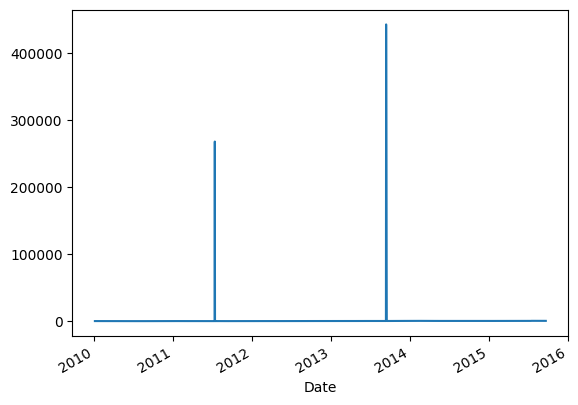

In [122]:
goog['Close'].plot();

In [123]:
goog.resample('BA').mean() #--> Agrupa por finales de año

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,267.154630,269.464070,1402.426456,266.811472,266.811472,6.383553e+06
2011-12-30,283.523139,286.110425,1484.356554,1346.348845,1346.348845,6.179412e+06
2012-12-31,320.195071,322.927847,317.288286,320.208021,320.208021,5.228172e+06
2013-12-31,440.160271,443.407307,437.217431,2196.153414,2196.153414,4.190346e+06
2014-12-31,2888.292431,564.495206,555.162255,559.803290,559.803290,2.487038e+06
2015-12-31,561.329028,566.266642,555.775389,561.112153,561.112153,2.094990e+06


In [85]:
goog.asfreq('BA') #--> Da el ultimo dia del año

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200


In [124]:
goog.loc['2012-12-31']

Open         3.486930e+02
High         3.539583e+02
Low          3.467005e+02
Close        3.523692e+02
Adj Close    3.523692e+02
Volume       4.009600e+06
Name: 2012-12-31 00:00:00, dtype: float64

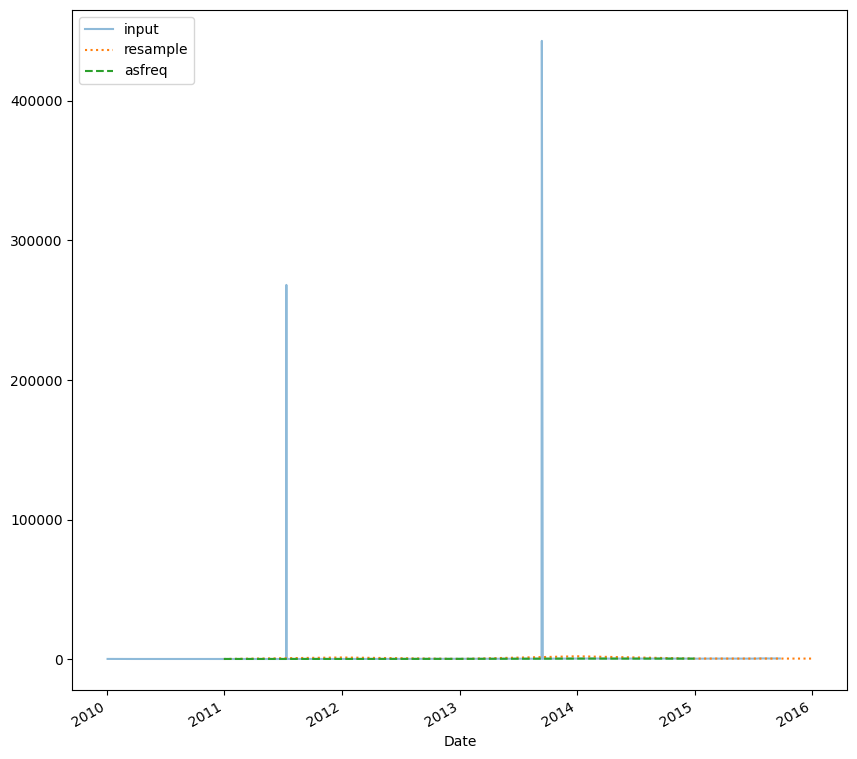

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
goog['Close'].plot(alpha=0.5, style='-')
goog['Close'].resample('BA').mean().plot(style=':')
goog['Close'].asfreq('BA').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [126]:
print(goog.resample('BA').mean()[-1:])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-12-31  561.329028  566.266642  555.775389  561.112153  561.112153   

                  Volume  
Date                      
2015-12-31  2.094990e+06  


In [127]:
print(goog.resample('BA').mean()[-1:])
goog.loc['2020'].mean()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-12-31  561.329028  566.266642  555.775389  561.112153  561.112153   

                  Volume  
Date                      
2015-12-31  2.094990e+06  


KeyError: '2020'

In [128]:
goog.asfreq('BA')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200


| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [129]:
goog = goog['Close']

In [130]:
goog.shift(1)

Date
2010-01-04           NaN
2010-01-05    312.204773
2010-01-06    310.829926
2010-01-07    302.994293
2010-01-08    295.940735
                 ...    
2015-09-16    635.140015
2015-09-17    635.979980
2015-09-18    642.900024
2015-09-21    629.250000
2015-09-22    635.440002
Name: Close, Length: 1440, dtype: float64

In [131]:
pd.DataFrame({'Data': goog,
             'Data-1': goog.shift(1),
             'Diff': goog - goog.shift(1),
             '%Crec': round(((goog - goog.shift(1))/goog)*100,2)})

,Data,Data-1,Diff,%Crec
Date,,,,
2010-01-04,312.204773,NaN,NaN,NaN
2010-01-05,310.829926,312.204773,-1.374847,-0.44
2010-01-06,302.994293,310.829926,-7.835633,-2.59
2010-01-07,295.940735,302.994293,-7.053558,-2.38
2010-01-08,299.885956,295.940735,3.945221,1.32
...,...,...,...,...
2015-09-16,635.979980,635.140015,0.839965,0.13
2015-09-17,642.900024,635.979980,6.920044,1.08
2015-09-18,629.250000,642.900024,-13.650024,-2.17


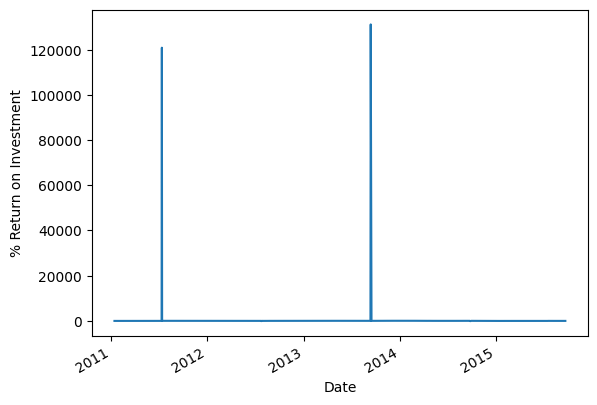

In [93]:
# Calcular el ROI de la inversión
ROI = 100 * (goog - goog.shift(261)) / goog.shift(261)
ROI.plot()
plt.ylabel('% Return on Investment');

### 16. Rolling window

In [94]:
rolling = goog.rolling(261, center=True) # 365 - weekends (aprox(52*2))
rolling

Rolling [window=261,center=True,axis=0,method=single]

In [95]:
rolling.mean()

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2015-09-16   NaN
2015-09-17   NaN
2015-09-18   NaN
2015-09-21   NaN
2015-09-22   NaN
Name: Close, Length: 1440, dtype: float64

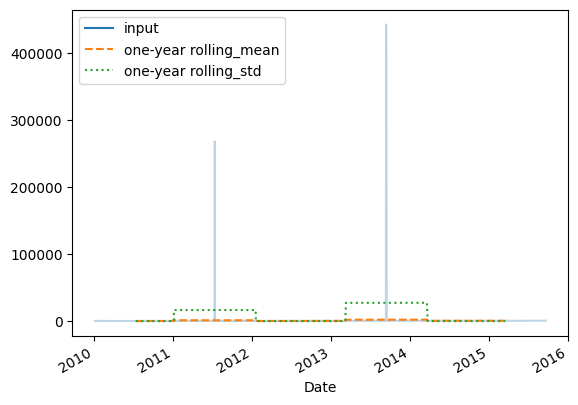

In [96]:
rolling = goog.rolling(261, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)